In [1]:
pip install twython

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tqdm.notebook import tqdm
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import string
import missingno as msno
sns.set(style="whitegrid")


import warnings
warnings.filterwarnings('ignore')

In [6]:
true = pd.read_csv("Data/true.csv")
fake = pd.read_csv("Data/fake.csv")

In [7]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


<Axes: >

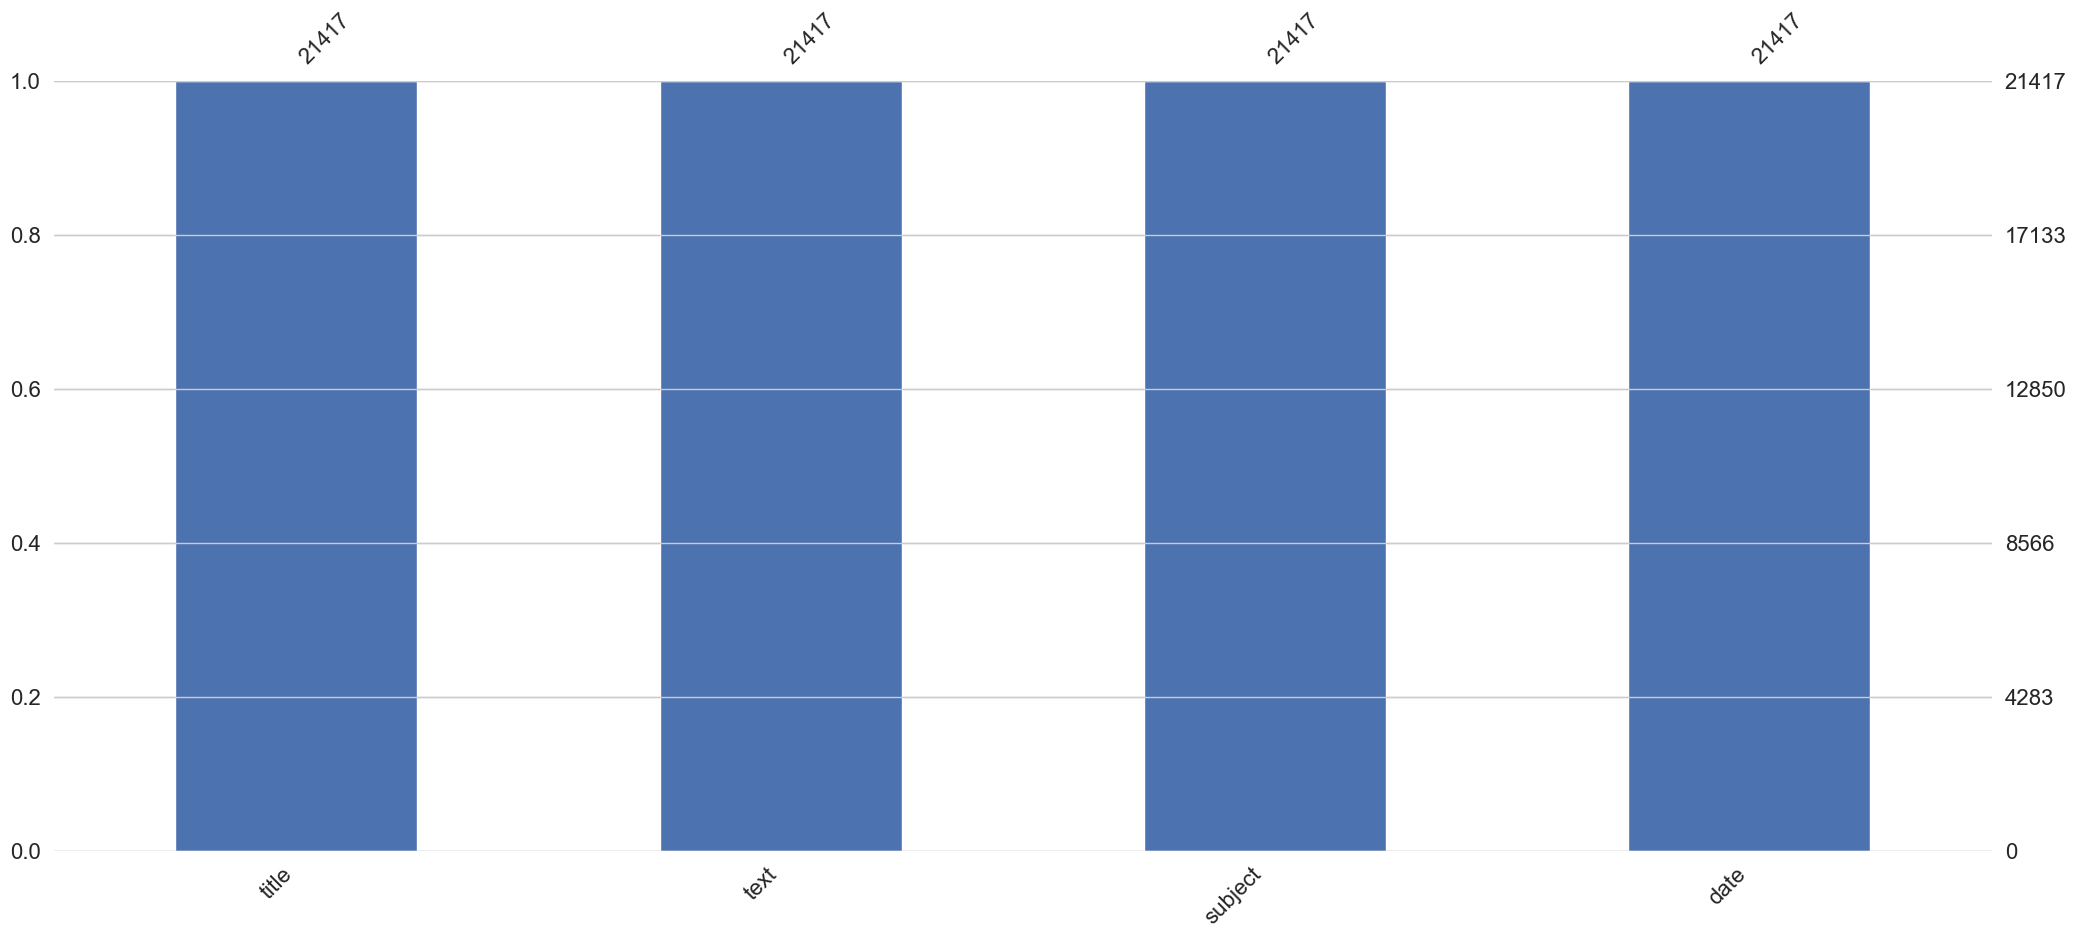

In [10]:
msno.bar(true, color = 'b')

In [11]:
true.duplicated().sum()

206

In [12]:
true.drop_duplicates(inplace=True)

In [13]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [14]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


<Axes: >

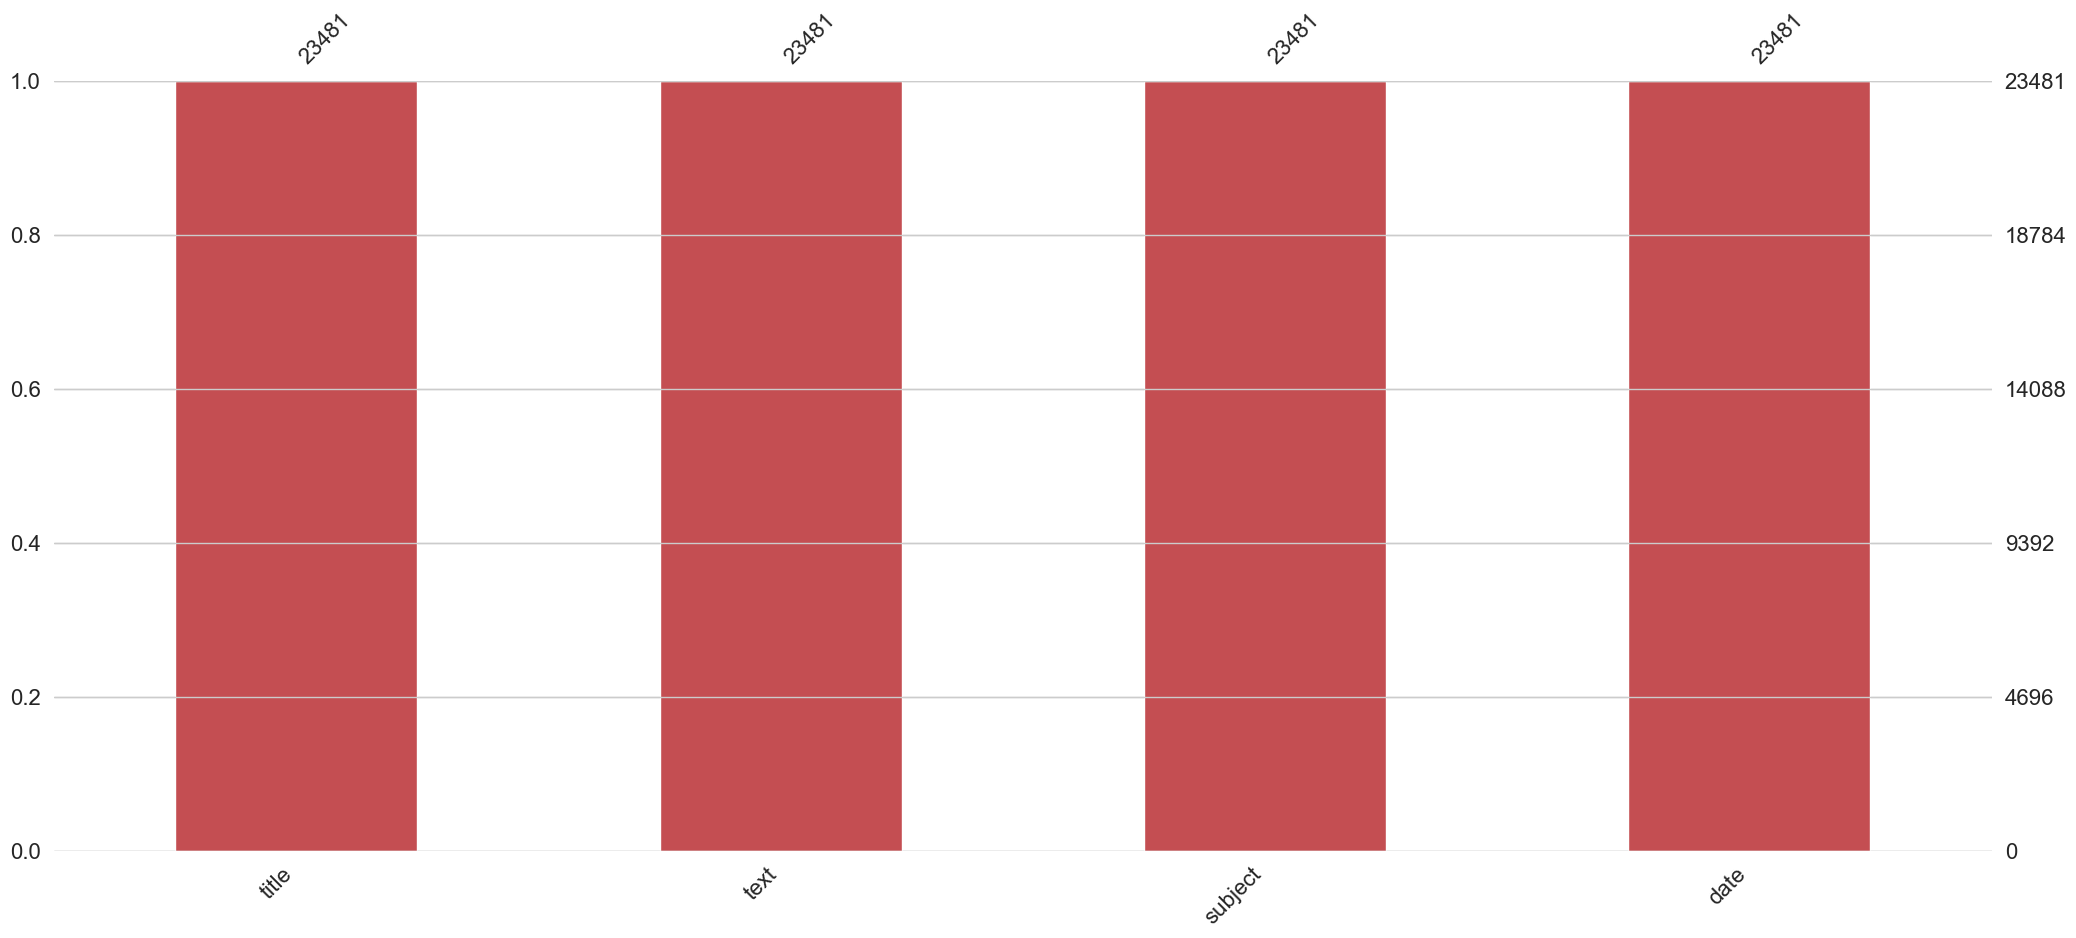

In [15]:
msno.bar(fake, color = 'r')

In [16]:
fake.duplicated().sum()

3

In [17]:
true.drop_duplicates(inplace=True)

In [18]:
true['label'] = 0
fake['label'] = 1

df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)

In [19]:
df['date'] = pd.to_datetime(df['date'],format='mixed', dayfirst=True,errors='coerce')

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month_name()

In [20]:
df.columns = df.columns.str.replace('_', ' ').str.title()

In [28]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
#Clean text
stopword = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

df["Text"] = df["Text"].apply(clean)

# Visualization

1    23481
0    21211
Name: Label, dtype: int64

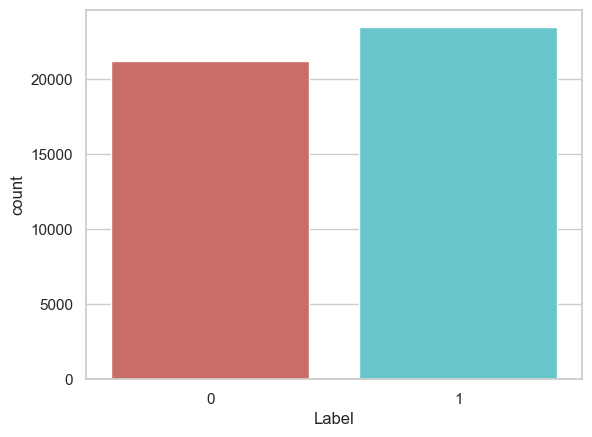

In [34]:
def create_distribution(dataFile):
    return sns.countplot(x='Label', data=dataFile, palette='hls')

create_distribution(df)

df['Label'].value_counts()

In [35]:
print(df['Month'].unique())


[nan]


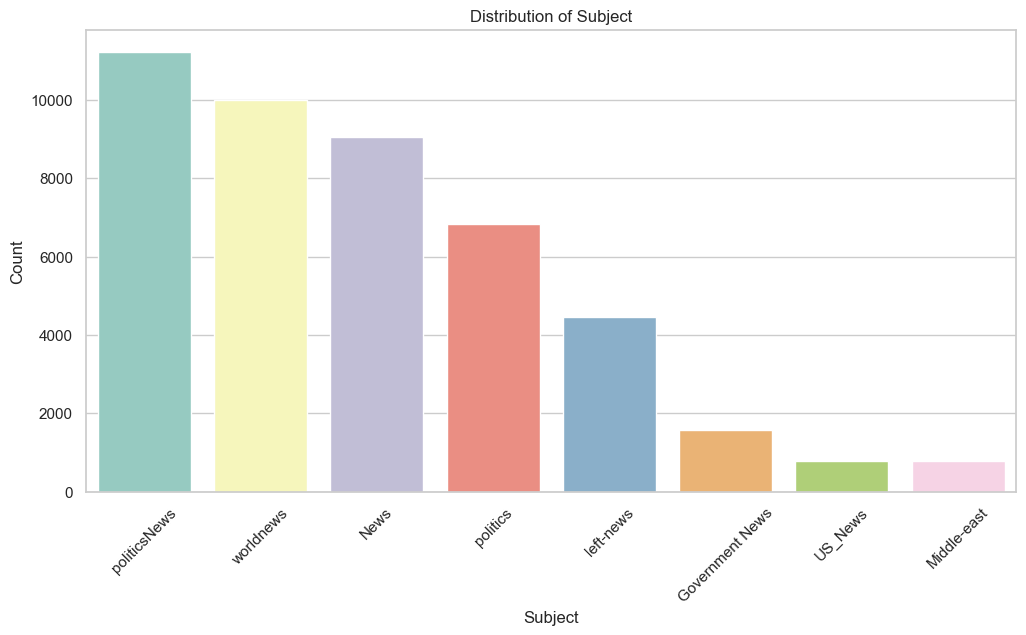

In [44]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', data=df, order=df['Subject'].value_counts().index, palette='Set3')
plt.title('Distribution of Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


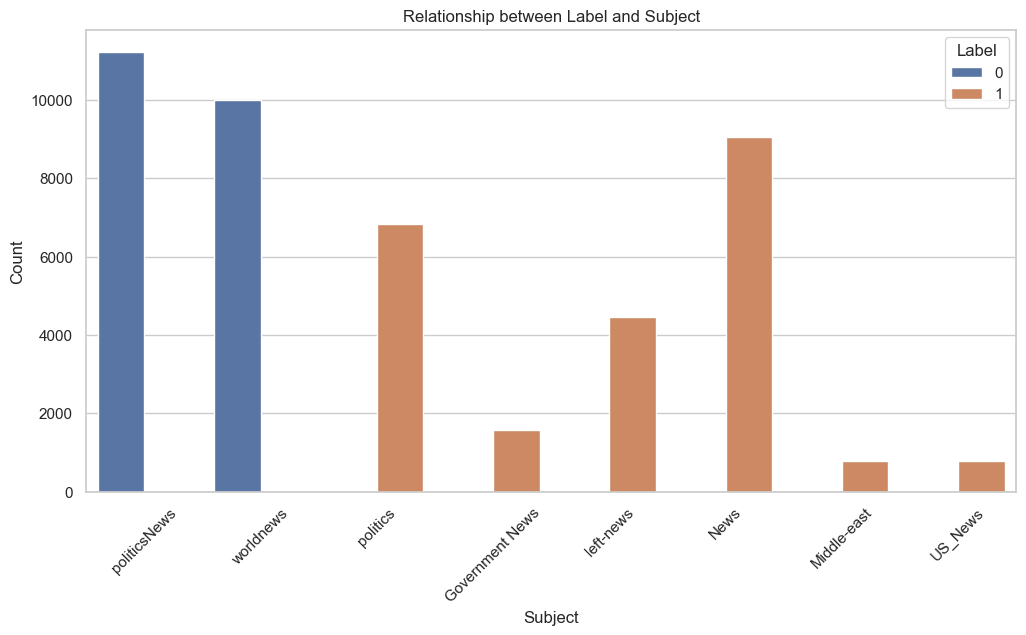

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Subject', hue='Label', data=df)
plt.title('Relationship between Label and Subject')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

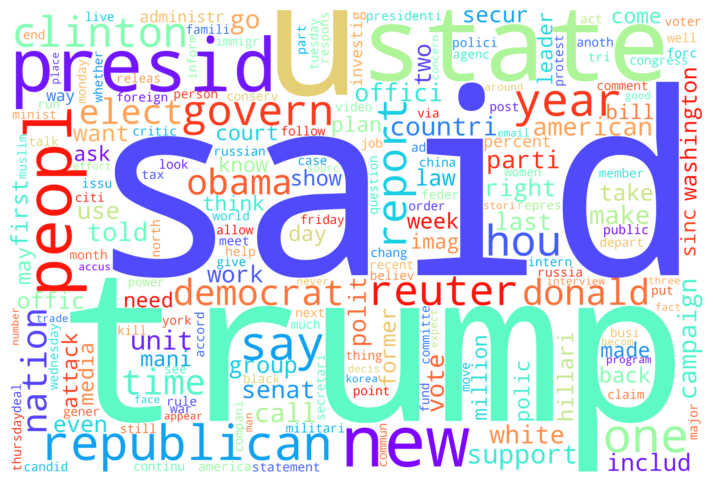

In [49]:
text = " ".join(df['Text'].astype(str))


wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


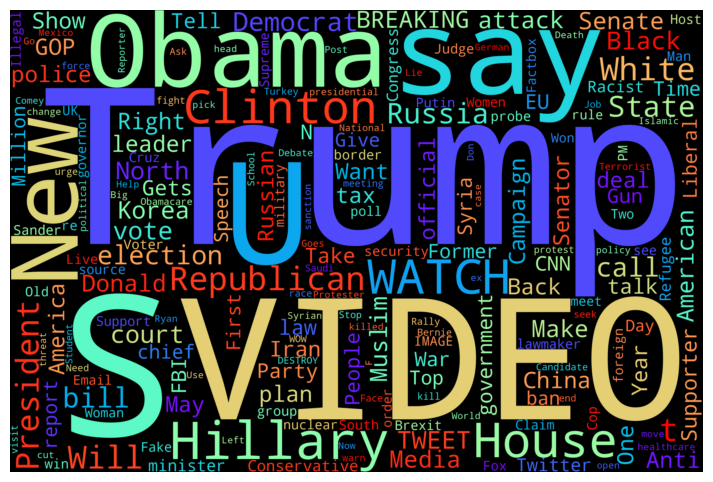

In [50]:
text = " ".join(df['Title'].astype(str))


wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='black', colormap='rainbow', collocations=False, stopwords=STOPWORDS).generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [52]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shimu\AppData\Roaming\nltk_data...


True

In [53]:
sia = SentimentIntensityAnalyzer()
res = {}

for i, row in tqdm(df.iterrows(), total=len(df), desc="Sentiment Analysis"):
    text = row['Text']
    my_id = row['Title'] 
    res[my_id] = sia.polarity_scores(text)

Sentiment Analysis:   0%|          | 0/44692 [00:00<?, ?it/s]

In [54]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Title'})
vaders = vaders.merge(df, how='left')

In [56]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    else:
        return "neutral"

vaders['sentiment'] = vaders['compound'].apply(lambda val: polarity_score(val))

In [57]:
vaders.head()

,Title,neg,neu,pos,compound,Text,Subject,Date,Label,Year,Month,sentiment
0,"Head of Senate panel says near deal on Russia,...",0.000,0.915,0.085,0.7506,washington reuter us lawmak near agreement wo...,politicsNews,NaT,0,NaN,NaN,positive
1,German police hunt shooter after man killed in...,0.426,0.516,0.058,-0.9842,berlin reuter polic northern german citi brem...,worldnews,NaT,0,NaN,NaN,negative
2,"U.S. State Department tweets, then deletes con...",0.138,0.741,0.121,-0.3182,washington reuter us state depart monday iss...,politicsNews,NaT,0,NaN,NaN,neutral
3,WHOA! WATCH All H*ll Break Loose After ABC Rep...,0.025,0.782,0.193,0.9371,love sarah huckabe nononsens spokesperson pres...,politics,NaT,1,NaN,NaN,positive
4,Putin says doping allegations against Russia m...,0.107,0.837,0.056,-0.8934,moscow reuter russian presid vladimir putin s...,worldnews,NaT,0,NaN,NaN,negative


In [58]:
vaders['sentiment'].value_counts()

positive    20206
negative    18504
neutral      5982
Name: sentiment, dtype: int64

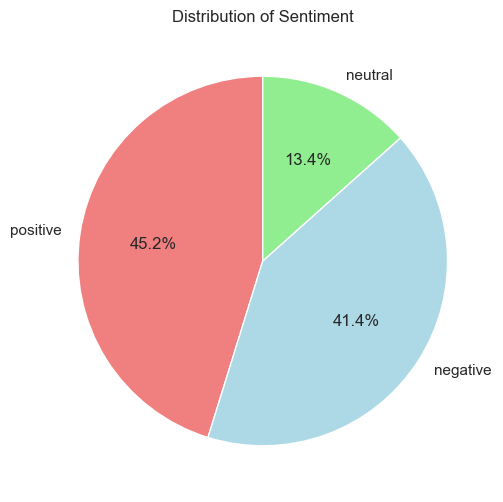

In [59]:
sentiment_counts = vaders['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue', 'lightgreen'])
plt.title('Distribution of Sentiment')
plt.show()

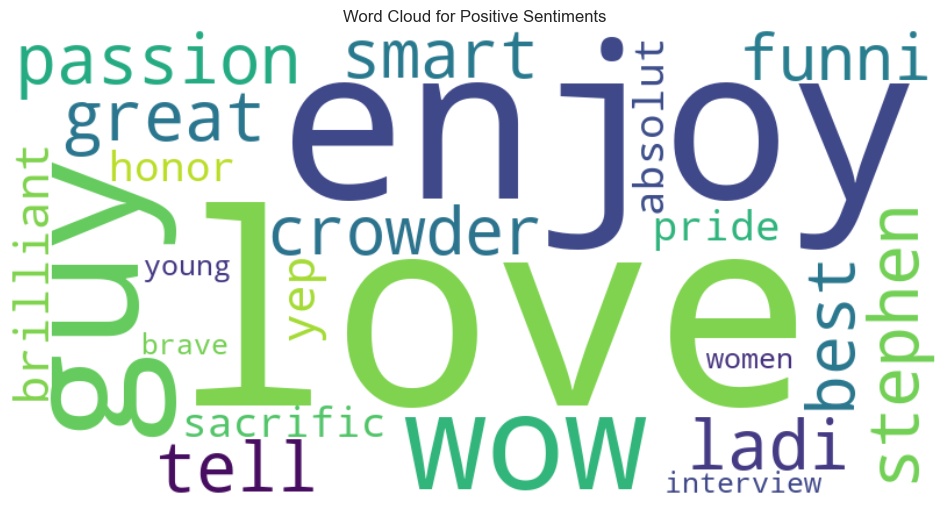

In [60]:
sorted_data = vaders.sort_values(by='pos', ascending=False)
top_20_pos = sorted_data.head(20)
positive_texts = ' '.join(sorted_data.head(20)['Text'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_texts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments')
plt.show()

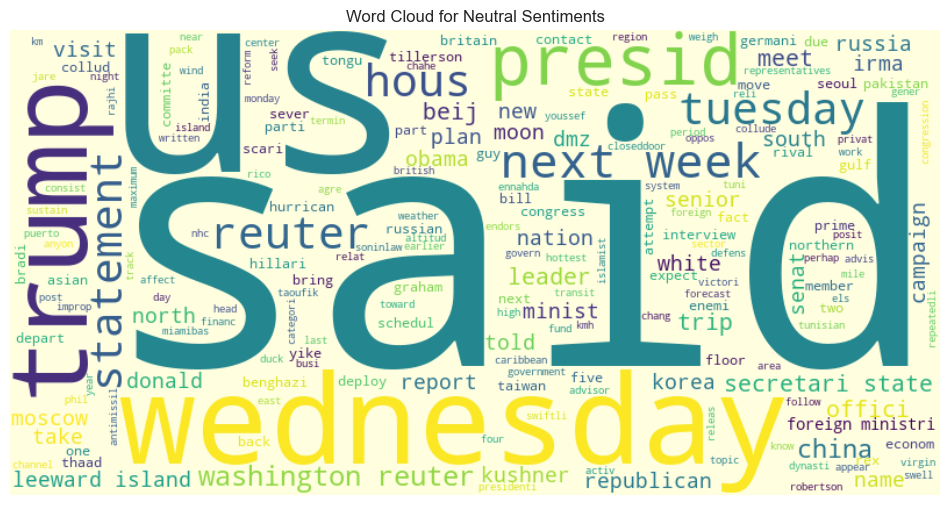

In [61]:
sorted_data_neu = vaders.sort_values(by='neu', ascending=False)

top_20_neu = sorted_data_neu.head(20)

neutral_texts = ' '.join(top_20_neu['Text'].tolist())

wordcloud_neu = WordCloud(width=800, height=400, background_color='lightyellow').generate(neutral_texts)

# Plot the word cloud for neutral sentiments
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Neutral Sentiments')
plt.show()

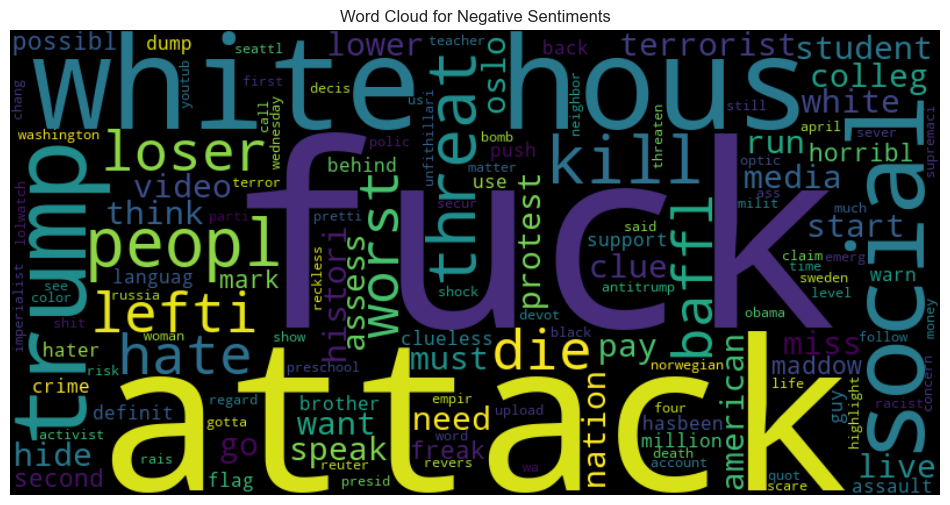

In [62]:
sorted_data = vaders.sort_values(by='neg', ascending=False)
top_20_neg = sorted_data.head(20)
negative_texts = ' '.join(top_20_neg['Text'].tolist())
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_texts)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments')
plt.show()

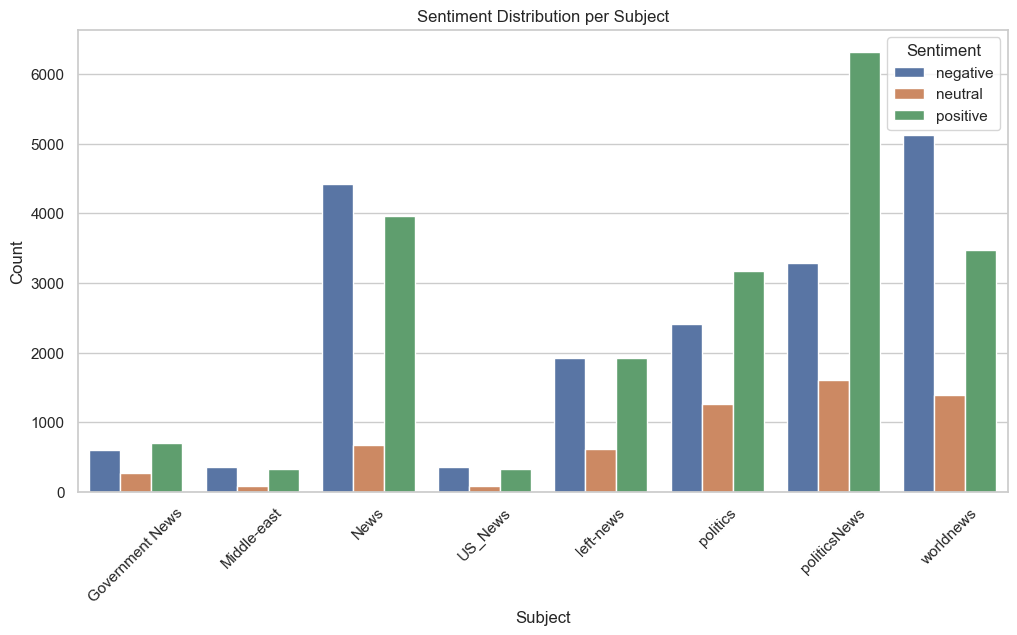

In [63]:
sentiment_counts = vaders.groupby(['Subject', 'sentiment'])['sentiment'].count().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='Subject', y='count', hue='sentiment', data=sentiment_counts)

plt.title('Sentiment Distribution per Subject')
plt.xlabel('Subject')
plt.ylabel('Count')

plt.legend(title='Sentiment')

plt.xticks(rotation=45)

plt.show()

# Modeling

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [65]:
df1 = vaders.copy()

# Passive Aggressive Classifier

In [66]:
X = df1['Text']  
y = df1['Label']

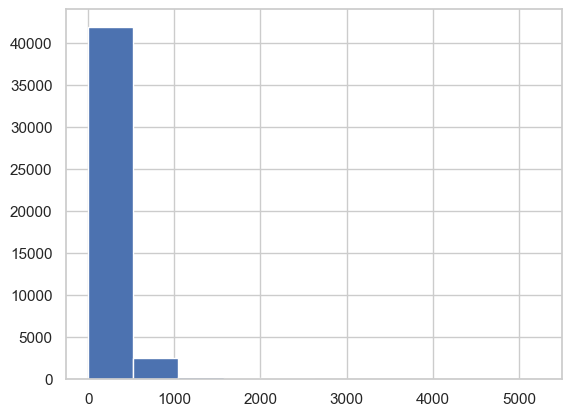

In [67]:
text_lengths = X.apply(lambda x: len(x.split(" ")))
plt.hist(text_lengths)
plt.show()

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [70]:
model = PassiveAggressiveClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(random_state=42)

In [71]:
y_pred = model.predict(X_test_tfidf)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [73]:
print('Classification Report:\n', classification_rep)
print(f'Accuracy: {accuracy:.2f}')

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      4235
           1       1.00      0.99      1.00      4704

    accuracy                           0.99      8939
   macro avg       0.99      0.99      0.99      8939
weighted avg       0.99      0.99      0.99      8939

Accuracy: 0.99


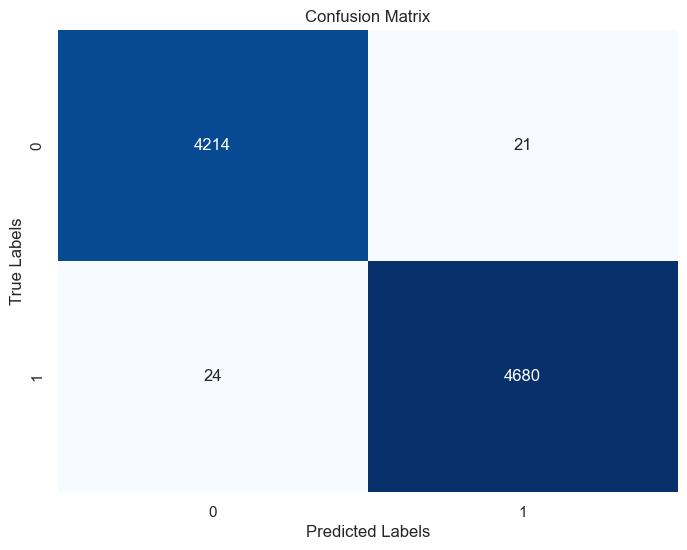

In [74]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

**Conclusion

*With this distribution, it can be concluded that the majority of texts in the dataset have a positive sentiment, followed by negative sentiment, and only a small portion is neutral

*The model performed very well with 99% accuracy, demonstrating its ability to correctly classify sentiment.

*The confusion matrix shows that the model has a small tendency to generate false positives and false negatives.